In [9]:
import numpy as np
import tensorflow as tf

In [10]:
# se pueden establecer semillas para validar que 
# los resultados sean correctos

np.random.seed(101)
tf.set_random_seed(101)

In [11]:
# inicializacion de algunos datos de prueba

In [12]:
r1 = np.random.uniform(0,100,(5,5))
r1

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [13]:
r2 = np.random.uniform(0,100,(5,1))
r2

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [14]:
# Si se desea confirmar la secuencia de valores, puede volver a probar
# con la misma semilla
# CONFIRM SAME  RANDOM NUMBERS (EXECUTE SEED IN SAME CELL!) Watch video for explanation
np.random.seed(101)
r11 = np.random.uniform(0,100,(5,5))
r22 = np.random.uniform(0,100,(5,1))

In [15]:
r1 == r11

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [16]:
r2 == r22

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

# contenedores

In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [18]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)

In [ ]:
# ejecución de una sesion para probar los diccionarios

In [23]:
with tf.Session() as ss:
    add_res = ss.run(add_op, feed_dict={a:r1, b:r2})
    print (add_res)
    
    print('\n')
    
    add_res = ss.run(mult_op, feed_dict={a:r1, b:r2})
    print (add_res)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


<hr>

# Ejemplo de una red

In [24]:
n_features = 10
n_dense_neurons = 3

In [25]:
# Contenedor para x
x = tf.placeholder(tf.float32,(None,n_features))

In [28]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [32]:
b


<tf.Variable 'Variable_4:0' shape=(3,) dtype=float32_ref>

In [33]:
W

<tf.Variable 'Variable_5:0' shape=(10, 3) dtype=float32_ref>

In [35]:
sess = tf.InteractiveSession()


* Algunas operaciones

In [39]:
xW = tf.matmul(x,W)

In [40]:
z = tf.add(xW,b)

In [41]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

In [43]:
init = tf.global_variables_initializer()


In [44]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [45]:
print(layer_out)

[[ 0.00358296  0.8974064   0.7784217 ]]


In [54]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 0.93679768,  1.62189237,  2.67752533,  3.10704016,  4.91423045,
        4.68304005,  7.14644022,  7.86664797,  9.63445   ,  8.78127057])

In [55]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [56]:
y_label

array([  0.85356555,   1.67283722,   2.80745771,   3.32393289,
         5.87052783,   4.66613842,   6.0637279 ,   6.96074546,
         7.53339555,  11.21191407])

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

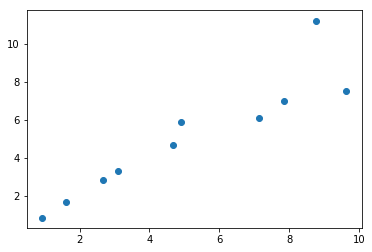

In [63]:
plt.scatter(x_data, y_label)

## inicio de la red

In [64]:
np.random.rand(2)

array([ 0.08010354,  0.60721627])

In [65]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

In [76]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #valor predicho
    
    error += (y-y_hat)**2 # Se debe minimizar el error


In [68]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [69]:
init = tf.global_variables_initializer()

In [70]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [72]:
final_slope

0.93316746

In [73]:
final_intercept

0.29664034

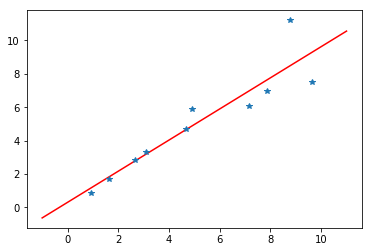

In [74]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')